In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
file = 'cifar-10-python/cifar-10-batches-py/data_batch_1'
data_batch1 = unpickle(file)

In [4]:
type(data_batch1)

dict

In [5]:
data_batch1.keys()


dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

Succesfully unpickled the data from databatch1 and saved it in a variable named `data_batch1`.
Ive checked the type and its a dict with the keys of the batch label, the labels/classes of the data ranging from 0-9 that correspdnds to what animal or object its depicting, the `b'data'` is the data of the red, green and blue values of the image. The file name of the image is simply the filename of the image.

In [6]:
data_batch1[b'data'].shape

(10000, 3072)

There is 10,000 values of `b'data'`

In [7]:
data_batch1[b'data'][0]

array([ 59,  43,  50, ..., 140,  84,  72], dtype=uint8)

The data at the moment is shaped not how the training model will like it, to counteract that i will reshape the data.

In [8]:
image = data_batch1[b'data'][0]
image = image.reshape(3,32,32)
image

array([[[ 59,  43,  50, ..., 158, 152, 148],
        [ 16,   0,  18, ..., 123, 119, 122],
        [ 25,  16,  49, ..., 118, 120, 109],
        ...,
        [208, 201, 198, ..., 160,  56,  53],
        [180, 173, 186, ..., 184,  97,  83],
        [177, 168, 179, ..., 216, 151, 123]],

       [[ 62,  46,  48, ..., 132, 125, 124],
        [ 20,   0,   8, ...,  88,  83,  87],
        [ 24,   7,  27, ...,  84,  84,  73],
        ...,
        [170, 153, 161, ..., 133,  31,  34],
        [139, 123, 144, ..., 148,  62,  53],
        [144, 129, 142, ..., 184, 118,  92]],

       [[ 63,  45,  43, ..., 108, 102, 103],
        [ 20,   0,   0, ...,  55,  50,  57],
        [ 21,   0,   8, ...,  50,  50,  42],
        ...,
        [ 96,  34,  26, ...,  70,   7,  20],
        [ 96,  42,  30, ...,  94,  34,  34],
        [116,  94,  87, ..., 140,  84,  72]]], dtype=uint8)

In [9]:
print(f'before: {image.shape}')
image = image.transpose(1,2,0)
print(f'after: {image.shape}')

before: (3, 32, 32)
after: (32, 32, 3)


# Visualisation

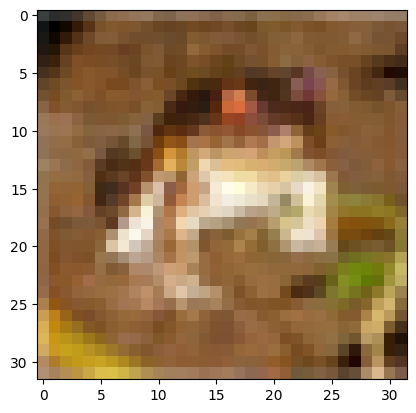

In [10]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [11]:
data = data_batch1[b'data']
data = data.reshape(len(data), 3, 32, 32).transpose(0,2,3,1)

print(data.shape)

(10000, 32, 32, 3)


In [12]:
# labels for the 10 different objects and animals
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#checking if it is 10 objects
print(len(labels))

10


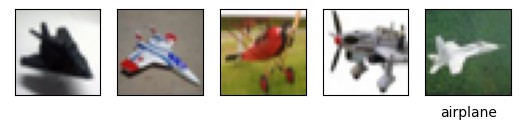

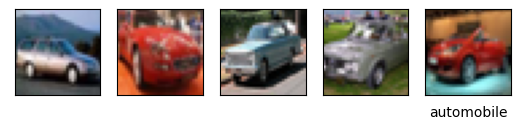

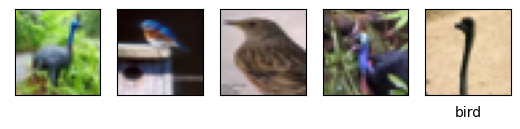

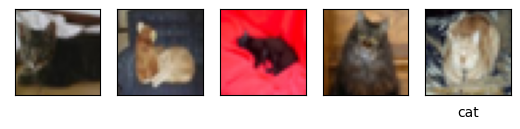

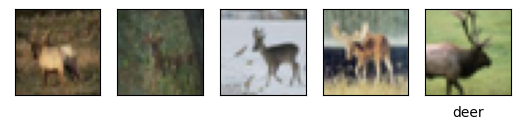

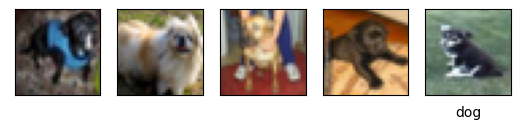

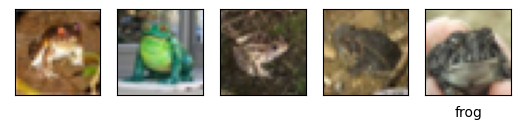

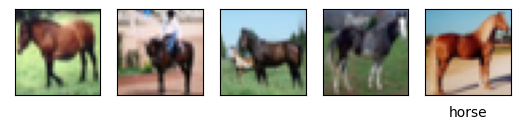

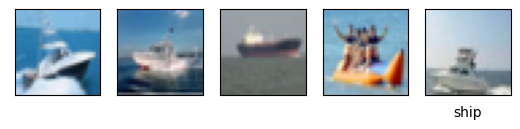

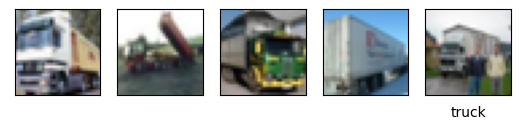

In [13]:

for i in range(len(labels)):
    image_num = []
    image_count = 0
    while len(image_num) < 5:
        if data_batch1[b'labels'][image_count] == i:
            image_num.append(image_count)
        image_count += 1

    for j in range(len(image_num)): # length of image_num = 5
        plt.subplot(1,5,j+1)
        plt.imshow(data[image_num[j]])
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
    #label of row
    plt.xlabel(labels[data_batch1[b'labels'][image_num[j]]])
    #showing the image
    plt.show()

frogs seem the most interesting to make a model to find them.

# Data Processing

Because there is 10,000 images in data batch one, that will be our training dataset. in order for a testing dataset i will use 2000 images from `data_batch_2`


In [14]:
import numpy as np
#DataBatch2
file_2 = 'cifar-10-python/cifar-10-batches-py/data_batch_3'
data_batch2 = unpickle(file_2)
data_2 = data_batch2[b'data']
data_2 = data_2.reshape(len(data_2), 3, 32, 32).transpose(0,2,3,1)

In [15]:
db2_testing = 2000

train_x = np.asarray(data)
train_y = np.asarray(data_batch1[b'labels'])

test_x = np.asarray(data_2[:db2_testing])
test_y = np.asarray(data_batch2[b'labels'][:db2_testing])

In [16]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks, models
from datetime import datetime

In [17]:
train_x[0].shape

(32, 32, 3)

In [18]:
model= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
test_x[0].shape

(32, 32, 3)

In [22]:
model.fit(train_x, train_y, epochs=50, validation_data=(test_x, test_y), batch_size=100)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 1.3652 - accuracy: 0.4999 - val_loss: 1.6363 - val_accuracy: 0.4355
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 1.2592 - accuracy: 0.5395 - val_loss: 1.5926 - val_accuracy: 0.4500
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 1.1839 - accuracy: 0.5650 - val_loss: 1.5857 - val_accuracy: 0.4480
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 1.1034 - accuracy: 0.5968 - val_loss: 1.6695 - val_accuracy: 0.4620
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 1.0365 - accuracy: 0.6260 - val_loss: 1.6676 - val_accuracy: 0.4660
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 0.9701 - accuracy: 0.6426 - val_loss: 1.6661 - val_accuracy: 0.4615
Epoch 7/50
100/100 [==============================] - 1s 6ms/step - loss: 0.8907 - accuracy: 0.6691 - val_loss: 1.7397 - val_accuracy: 0.4670
Epoch 

In [23]:
model.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets


INFO:tensorflow:Assets written to: output/my_model\assets


horse


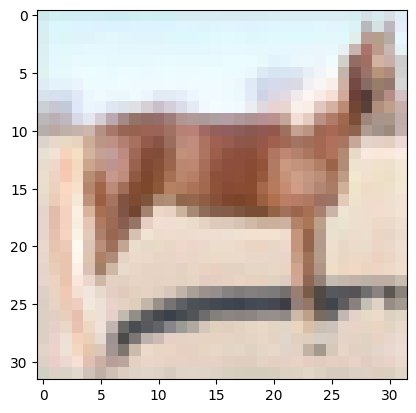

In [24]:
plt.imshow(test_x[10])
print(labels[test_y[10]])

In [25]:
y_pred = model.predict(test_x)

63/63 [==============================] - 0s 2ms/step


In [42]:
#isforg
y_pred[10]

array([1.7727576e-12, 4.1418444e-22, 4.5206807e-09, 1.0039994e-09,
       9.7529560e-01, 5.7780287e-08, 9.5251949e-12, 2.4704374e-02,
       2.0350601e-12, 1.1691990e-11], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[10])


4


In [44]:
def isfrogtest(test_num):
    plt.imshow(test_x[test_num])
    if y_classes[test_num] == 6:
        print(f"Frog! \n{round(float(y_pred[test_num][6]),2)} sure a frog")
    else:
        print(f'Not a frog! \n{1 - round(float(y_pred[test_num][6]), 2)} sure not a frog \nMight be a {labels[y_classes[test_num]]}')



Not a frog! 
1.0 sure not a frog 
Might be a deer


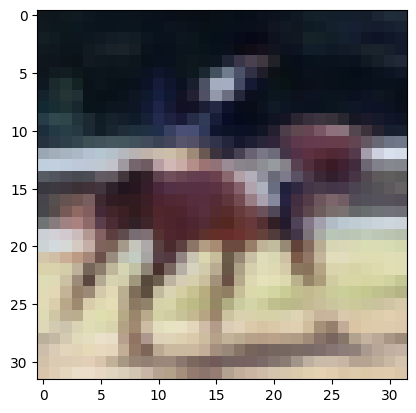

In [49]:
isfrogtest(109)

Frog! 
0.97 sure a frog


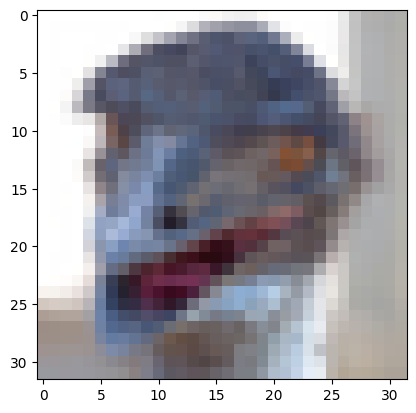

In [41]:
isfrogtest(5)

# turning image url into correct np array

C:\Users\maxco\AppData\Local\Temp\ipykernel_23856\2662928405.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((width,width), Image.ANTIALIAS)


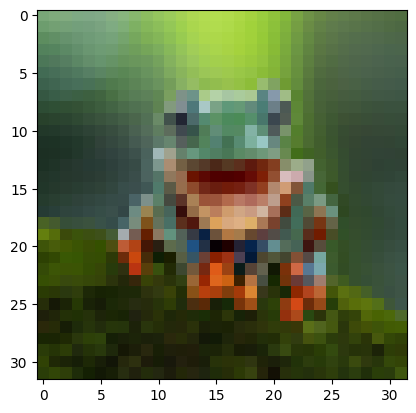

In [31]:
import requests
from PIL import Image

width = 32
url = 'https://cdn.britannica.com/84/206384-050-00698723/Javan-gliding-tree-frog.jpg'
r = requests.get(url)
with open('original_image.png', 'wb') as f:
    f.write(r.content)

img = Image.open('original_image.png')
img = img.resize((width,width), Image.ANTIALIAS)
img.save('resized.png')
img_data = plt.imread('resized.png')
plt.imshow(img_data)

In [32]:
#img_data = img_data.reshape(len(img_data), 3, 32, 32).transpose(0,2,3,1)
img_data = np.asarray(img_data)
img_data = img_data.reshape((1,32,32,3))
img_predict = model.predict(img_data)

1/1 [==============================] - 0s 111ms/step


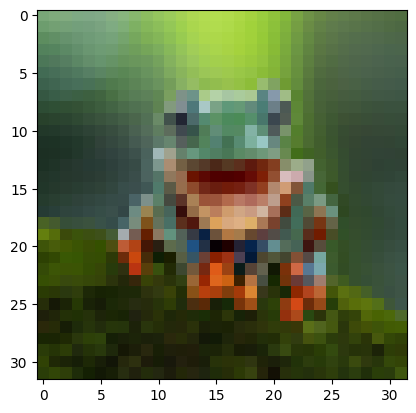

In [33]:
plt.imshow(img_data[0])

In [34]:
print(img_predict[0][6])

0.22319637


In [35]:
#function when you get the URL you get if its a frog or not

def isfrog(url):
    width = 32
    r = requests.get(url)
    with open('original_image.png', 'wb') as f:
        f.write(r.content)
    #sorting out, making into array
    img = Image.open('original_image.png')
    img = img.resize((width,width), Image.Resampling.LANCZOS)
    img.save('resized.png')
    img_data = plt.imread('resized.png')
    plt.imshow(img_data)

    #making into numpy array and reshaping the data
    img_data = np.asarray(img_data)
    img_data = img_data.reshape((1,32,32,3))

    #using the model to predict
    img_predict = model.predict(img_data)

    most_likley = [np.argmax(element) for element in img_predict]
    if most_likley[0] == 6:
        print(f"\nFrog! \n{img_predict[0][6]} sure a frog")
    else:
        print(f'\nNot a frog! \n{img_predict[0][6]} sure a frog \nMight be a {labels[most_likley[0]]}')

1/1 [==============================] - 0s 35ms/step

Frog! 
0.2334533929824829 sure a frog


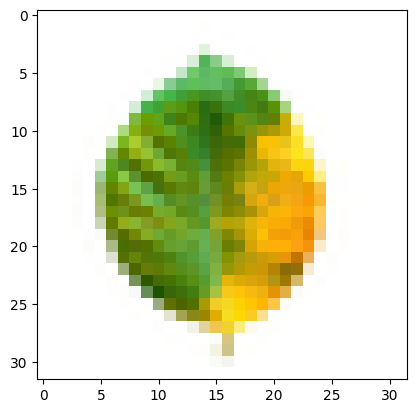

In [40]:
isfrog('https://thumbs.dreamstime.com/b/leaves-white-background-laef-isolate-dry-leaves-white-background-laef-isolate-laef-green-yellow-103705725.jpg')